# Final Project

#### Have you ever finished all of your homework and had nothing to do? Your friends are busy and you have watched all of the movies on Netflix, but you are sick of TikTok and social media, so what is there to do? With our final project research, you can go to Pittsburgh's best neighborhood to be a crime fighter and take on the bad guys of Western PA.

# Metric 1: Crime

There needs to be crime to be able to fight crime. For this metric, we used a dataset that records crime by neighborhood. The top neighborhood will be the one with the most amount of crime reported.

In [1]:
import pandas as pd
import geopandas
%matplotlib inline

crime = pd.read_csv("incident.csv")
crime.head(5)

PK       CCR  HIERARCHY         INCIDENTTIME  \
0  2802309  16000001         10  2016-01-01T00:00:00   
1  2803174  16004547         11  2016-01-01T00:01:00   
2  2801809  16000367          4  2016-01-01T00:10:00   
3  2802315  16000035         10  2016-01-01T00:15:00   
4  2802312  16000024          4  2016-01-01T00:16:00   

                                INCIDENTLOCATION CLEAREDFLAG  \
0  400 Block North Shore DR Pittsburgh, PA 15212           Y   
1    5400 Block Carnegie ST Pittsburgh, PA 15201           N   
2  500 Block Mt Pleasant RD Pittsburgh, PA 15214           N   
3         300 Block Wood ST Pittsburgh, PA 15222           Y   
4  500 Block Mt Pleasant RD Pittsburgh, PA 15214           N   

          INCIDENTNEIGHBORHOOD INCIDENTZONE  \
0                  North Shore            1   
1          Upper Lawrenceville            2   
2            Northview Heights            1   
3  Golden Triangle/Civic Arena            2   
4            Northview Heights            1   

                      INCIDENTHIERARCHYDESC  \
0            HARRASSMENT/THREAT/ATTEMPT/PHY   
1                        THEFT BY DECEPTION   
2   DISCHARGE OF FIREARM INTO OCC.STRUCTURE   
3            HARRASSMENT/THREAT/ATTEMPT/PHY   
4  PROP MISSILE INTO OCC VEHICLE/OR ROADWAY   

                                            OFFENSES  INCIDENTTRACT  \
0  2702 Aggravated Assault. / 2709(a) Harassment....         2205.0   
1                           3922 Theft by Deception.         1011.0   
2  2707.1 Discharge of a Firearm into Occupied St...         2609.0   
3        2709(a)(3) Harassment No Legitimate Purpose          201.0   
4  2705 Recklessy Endangering Another Person. / 3...         2609.0   

   COUNCIL_DISTRICT  PUBLIC_WORKS_DIVISION          X          Y  
0               1.0                    6.0 -80.012337  40.446263  
1               7.0                    2.0 -79.950295  40.482290  
2               1.0                    1.0 -80.000966  40.478651  
3               6.0                    6.0 -80.001251  40.438918  
4               1.0                    1.0 -80.000966  40.478651

Now that we have seen what the dataset looks like, we need to see which neighborhoods appear the most. To do this, we are going to use count(). We are also storing this information in a dataframe, so we can use it later when creating a map.

In [7]:
crime2 = crime[['INCIDENTLOCATION', 'INCIDENTNEIGHBORHOOD']].copy()
crime2.rename(columns = {'INCIDENTNEIGHBORHOOD':'neighborhood'}, inplace = True)
numIncidents = crime2.groupby("neighborhood").count()["INCIDENTLOCATION"]
numData = pd.DataFrame(numIncidents)
numData.columns = ["COUNT"]
numData.sort_values(by= 'COUNT', ascending=False)

COUNT
neighborhood                      
South Side Flats              4419
Golden Triangle/Civic Arena   3637
Carrick                       2435
Bloomfield                    2418
Shadyside                     1803
...                            ...
Outside County                  42
Outside State                   41
Chartiers City                  37
Mount Oliver                    36
Mt. Oliver Boro                 16

[98 rows x 1 columns]

According to the dataframe above, South Side Flats is the neighborhood with the most crime. Let's visualize this data.

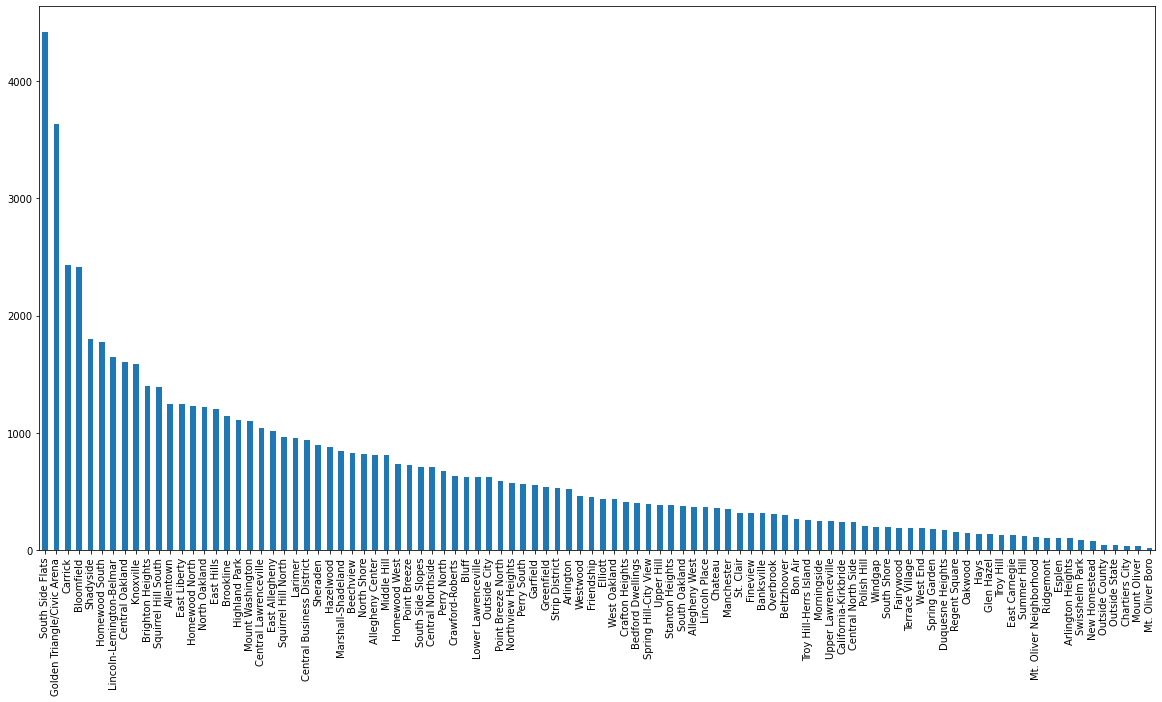

In [4]:
crime["INCIDENTNEIGHBORHOOD"].value_counts().plot(kind='bar', rot=90, figsize=(20, 10))

Although this bar graph lists all of the neighborhoods, it is inefficient because of difference of crime between the first and last neighborhood. To get a better idea of which neighborhoods have the most amount of crime, let's just look at the top twenty.

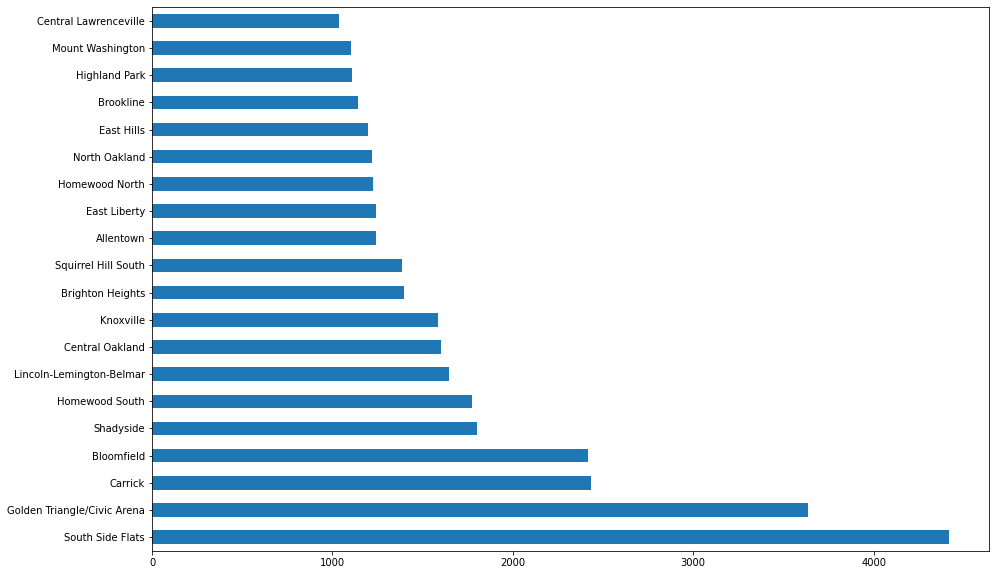

In [5]:
crimesort = crime["INCIDENTNEIGHBORHOOD"].value_counts()
crimesort[:20].plot.barh(x="Neighborhood",y="Incidents",
                                 figsize=(15,10))

Ok, now that we know the top 20 neighborhoods, we decided to create a scatter plot with the location of each neighborhood that has a recorded crime.

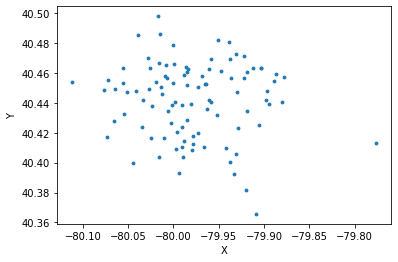

In [6]:
crime_mask = crime["X"]< 0
crime_mask2 = crime["Y"]> 0
crime = crime[crime_mask & crime_mask2]
dropDup = crime.drop_duplicates(subset=['INCIDENTNEIGHBORHOOD'])
dropDup.plot.scatter(x = 'X', y = 'Y', s=8)

However, this doesn't show which area has the most amount of crime. To create a visualization that does this, we used a geopandas map. First, let's import the shape file.

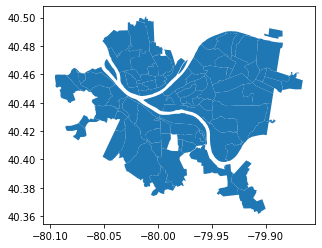

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
neighborhoods.plot()

Next, we merged the dataframe that we created earlier with the shape file dataset. The purpose of doing this was so that we could create our own column called "COUNT", which holds the number of crimes reported per neighborhood.

In [8]:
crime_map = neighborhoods.merge(numData, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
crime_map.sort_values(by='COUNT', ascending=False)

objectid  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
61      1354          16        42        003    170200          1   
76      1369          74        42        003    290400          3   
24      1317          73        42        003    080200          2   
31      1324         167        42        003    070900          2   
21      1314         286        42        003    130400          3   
..       ...         ...       ...        ...       ...        ...   
71      1364         202        42        003    561600          1   
54      1347          83        42        003    141100          1   
20      1313         326        42        003    310300          1   
86      1379         265        42        003    563000          4   
69      1362         147        42        003    561700          2   

         geoid10     namelsad10 mtfcc10 funcstat10  ...           plannerass  \
61  420031702001  Block Group 1   G5030          S  ...        Anthony Kobak   
76  420032904003  Block Group 3   G5030          S  ...       Sophia Robison   
24  420030802002  Block Group 2   G5030          S  ...  Christopher Corbett   
31  420030709002  Block Group 2   G5030          S  ...  Christopher Corbett   
21  420031304003  Block Group 3   G5030          S  ...  Christopher Corbett   
..           ...            ...     ...        ...  ...                  ...   
71  420035616001  Block Group 1   G5030          S  ...        Anthony Kobak   
54  420031411001  Block Group 1   G5030          S  ...        Ose Akinlotan   
20  420033103001  Block Group 1   G5030          S  ...        Ose Akinlotan   
86  420035630004  Block Group 4   G5030          S  ...       Sophia Robison   
69  420035617002  Block Group 2   G5030          S  ...        Anthony Kobak   

    created_us  created_da last_edite  last_edi_1  temp    Shape__Are  \
61   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  2.608218e+07   
76   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  4.664023e+07   
24   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  1.957410e+07   
31   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  2.567309e+07   
21   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  1.091314e+07   
..         ...         ...        ...         ...   ...           ...   
71   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  3.667473e+06   
54   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  1.337930e+07   
20   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  2.215124e+07   
86   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  3.683820e+06   
69   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  2.872020e+06   

      Shape__Len                                           geometry   COUNT  
61  34676.151320  POLYGON ((-79.97726 40.43272, -79.97725 40.432...  4419.0  
76  40404.497700  POLYGON ((-79.99194 40.40719, -79.99191 40.407...  2435.0  
24  21204.322895  POLYGON ((-79.94645 40.46547, -79.94621 40.465...  2418.0  
31  25089.464739  POLYGON ((-79.92238 40.46055, -79.92208 40.460...  1803.0  
21  16284.901805  POLYGON ((-79.88666 40.45521, -79.88651 40.455...  1774.0  
..           ...                                                ...     ...  
71  10586.530790  POLYGON ((-79.96568 40.41735, -79.96566 40.417...   103.0  
54  20794.440321  POLYGON ((-79.89143 40.42685, -79.89192 40.426...    83.0  
20  24388.292456  POLYGON ((-79.91621 40.39849, -79.91621 40.398...    78.0  
86   9978.225999  POLYGON ((-80.06919 40.46046, -80.06912 40.460...    37.0  
69   7445.900720  POLYGON ((-79.97842 40.40626, -79.97848 40.406...     NaN  

[90 rows x 40 columns]

Now that the data has been succesfully merged, we then used .plot() to create the map. This map should show an efficient visualization of the neighboorhood with the most crime.

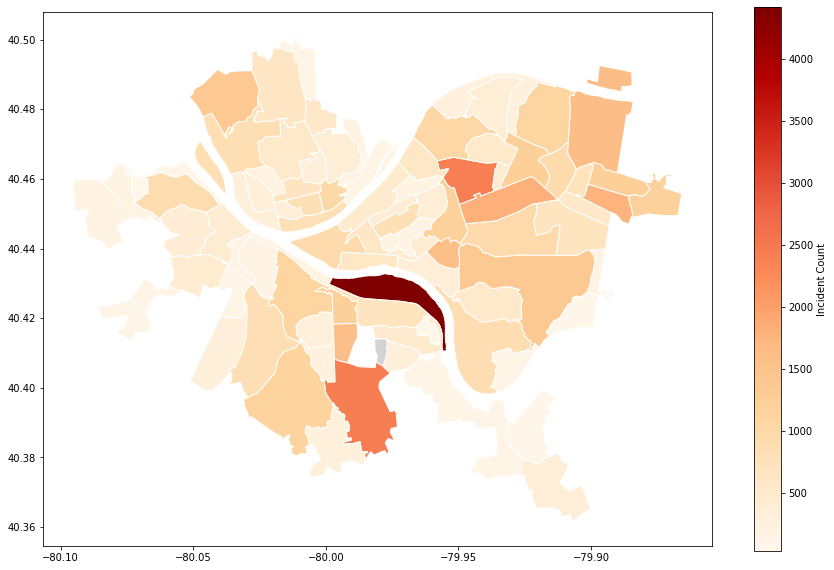

In [9]:
crime_map.plot(column='COUNT',
               cmap='OrRd',              
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Incident Count"}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} 
               )

# Metric 2: Unsafe Streets and Undesirable People

For our second metric, we chose to use this data set because crime happens at a much higher rate on and around unsafe streets. Although undesirable people was not a defined group of data, we thought it was an important piece of data because this probably includes people wandering around neighborhoods and streets where they do not reside, which can cause crime rates to go up. 

In [4]:
import pandas as pd
import geopandas

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
neighborhoods = pd.read_csv("nh.csv")
neighborhoods

neighborhood  unsafe_streets_not_problem  \
0       All neighborhoods                          25   
1                Westwood                          48   
2               31st ward                          53   
3               Arlington                          17   
4        Allegheny Center                          16   
..                    ...                         ...   
66         Swisshlem Park                          36   
67              Troy Hill                          41   
68                 Uptown                          12   
69               West End                          24   
70  Woods Run-Halls Grove                          16   

    unsafe_streets_minor_moderate_problem  \
0                                      45   
1                                      34   
2                                      20   
3                                      53   
4                                      33   
..                                    ...   
66                                     49   
67                                     47   
68                                     24   
69                                     43   
70                                     67   

    unsafe_streets_very_serious_problem  vandalism_not_problem  \
0                                    21                     13   
1                                     7                     16   
2                                    13                     47   
3                                    18                      8   
4                                    41                     10   
..                                  ...                    ...   
66                                    7                     12   
67                                    5                     18   
68                                   56                      6   
69                                   19                     10   
70                                   11                     11   

    vandalism_minor_moderate_problem  vandalism_very_serious_problem  \
0                                 49                              28   
1                                 63                              14   
2                                 40                               0   
3                                 41                              35   
4                                 35                              43   
..                               ...                             ...   
66                                39                              42   
67                                61                              13   
68                                24                              56   
69                                48                              29   
70                                73                              11   

    rats_not_problem  rats_minor_moderate_problem  rats_very_serious_problem  \
0                 34                           33                         12   
1                 43                           29                         10   
2                 27                           40                         20   
3                 29                           40                         14   
4                 33                           16                         18   
..               ...                          ...                        ...   
66                41                           34                         12   
67                53                           31                          1   
68                32                           29                         21   
69                19                           29                         10   
70                31                           36                         20   

    ...  vacant_buildings_very_serious_problem  undesirable_peoplenot_problem  \
0   ...                                     13                             42   
1   ..

I loaded in my data set assigning it to "neighborhooods".

In [6]:
numUnsafeSkreets = neighborhoods[["neighborhood", "unsafe_streets_very_serious_problem"]]
hoods = neighborhoods["neighborhood"]
skreets = neighborhoods["unsafe_streets_very_serious_problem"]
#numUnsafeSkreets = pd.DataFrame(hoods, skreets)
numUnsafeSkreets

neighborhood  unsafe_streets_very_serious_problem
0       All neighborhoods                                   21
1                Westwood                                    7
2               31st ward                                   13
3               Arlington                                   18
4        Allegheny Center                                   41
..                    ...                                  ...
66         Swisshlem Park                                    7
67              Troy Hill                                    5
68                 Uptown                                   56
69               West End                                   19
70  Woods Run-Halls Grove                                   11

[71 rows x 2 columns]

I wanted to only look at each neighborhood's "unsafe streets very serious problem" data, so I created a new data frame called numUnsafeSkreets to be able to look at this data alone.

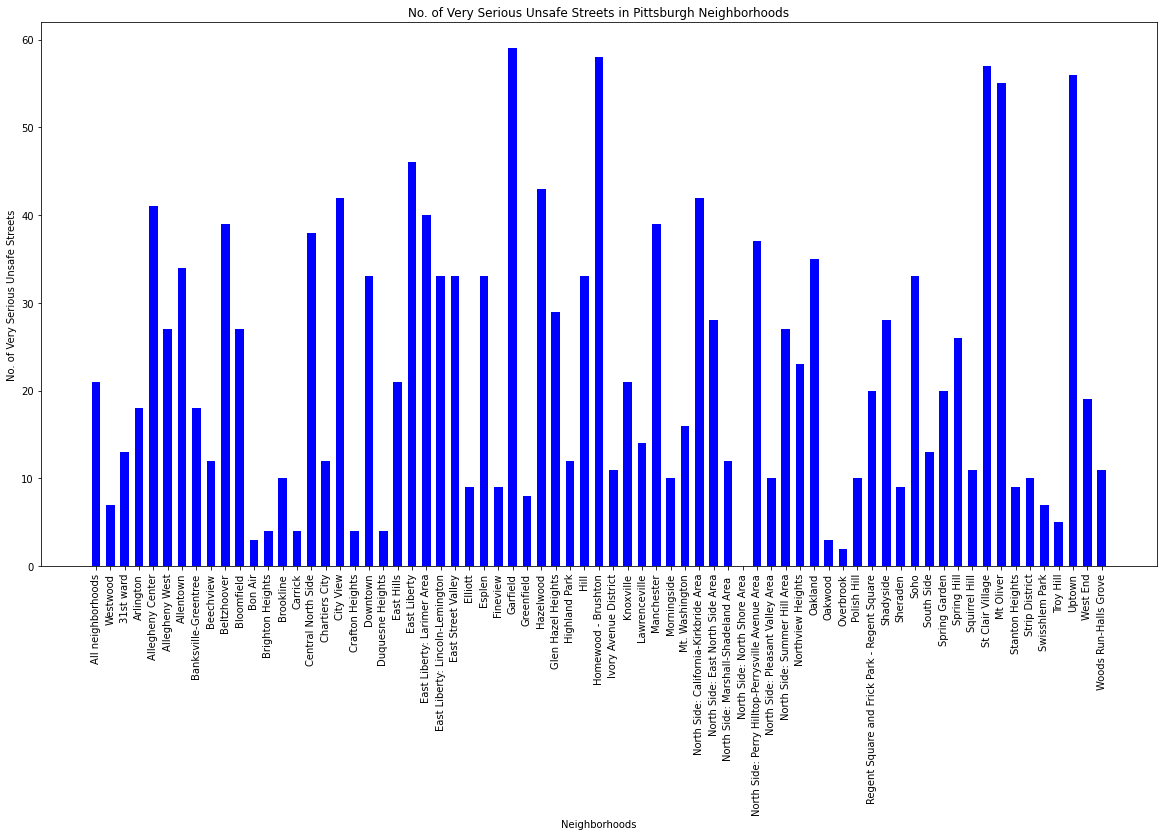

In [13]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(hoods, skreets, color ='blue',
        width = 0.6)
plt.xticks(rotation=90)
 
plt.xlabel("Neighborhoods")
plt.ylabel("No. of Very Serious Unsafe Streets")
plt.title("No. of Very Serious Unsafe Streets in Pittsburgh Neighborhoods")
plt.show()

To get a visual, I graphed all of the neighborhoods' number of unsafe streets. It looks like Garfield has the most, but we can take a closer looks to make sure.

In [14]:
top20 = numUnsafeSkreets.sort_values(by= 'unsafe_streets_very_serious_problem', ascending=False)[:20]
topHoods = top20["neighborhood"]
topSkreets = top20["unsafe_streets_very_serious_problem"]
top20

neighborhood  \
29                                           Garfield   
35                                Homewood - Brushton   
62                                   St Clair Village   
68                                             Uptown   
63                                          Mt Oliver   
22                                       East Liberty   
31                                          Hazelwood   
42              North Side: California-Kirkbride Area   
17                                          City View   
4                                    Allegheny Center   
23                         East Liberty: Larimer Area   
9                                         Beltzhoover   
39                                         Manchester   
15                                 Central North Side   
46  North Side: Perry Hilltop-Perrysville Avenue Area   
50                                            Oakland   
6                                           Allentown   
34                                               Hill   
27                                             Esplen   
25                                 East Street Valley   

    unsafe_streets_very_serious_problem  
29                                   59  
35                                   58  
62                                   57  
68                                   56  
63                                   55  
22                                   46  
31                                   43  
42                                   42  
17                                   42  
4                                    41  
23                                   40  
9                                    39  
39                                   39  
15                                   38  
46                                   37  
50                                   35  
6                                    34  
34                                   33  
27                                   33  
25                                   33

To be able to get a better look at the higher numbers in my data, I decided to make a new data frame that is sorted with the top 20 neighborhoods with the most unsafe streets very serious problem.

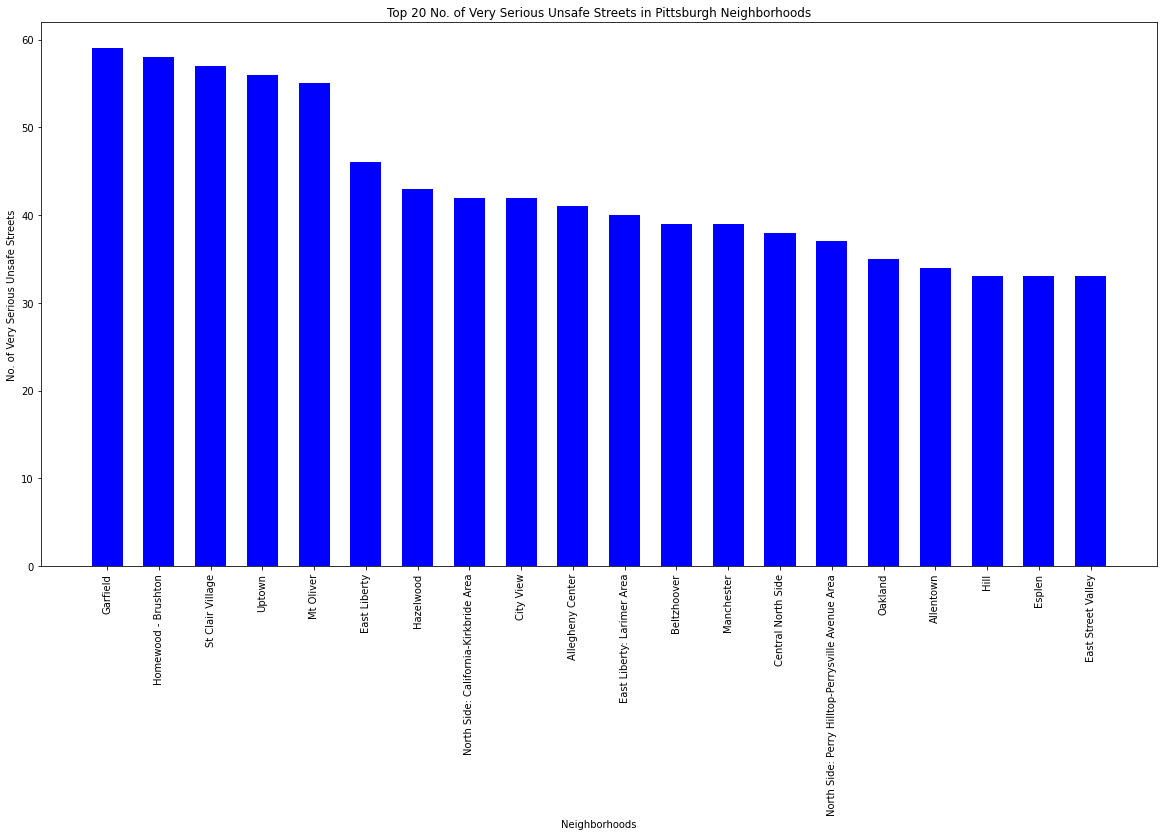

In [15]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(topHoods, topSkreets, color ='blue',
        width = 0.6)
plt.xticks(rotation=90)
 
plt.xlabel("Neighborhoods")
plt.ylabel("No. of Very Serious Unsafe Streets")
plt.title("Top 20 No. of Very Serious Unsafe Streets in Pittsburgh Neighborhoods")
plt.show()

Now that we have a better look at the data, we can see that Garfield does have the most very serious unsafe streets.

In [16]:
undesirablePeople = neighborhoods[["neighborhood", "undesirable_people_very_serious_problem"]]
hoodsPeople = neighborhoods["neighborhood"]
people = neighborhoods["undesirable_people_very_serious_problem"]
#numUnsafeSkreets = pd.DataFrame(hoods, skreets)
undesirableSorted = undesirablePeople.sort_values(by= 'undesirable_people_very_serious_problem', ascending=False)
undesirableSorted

neighborhood  undesirable_people_very_serious_problem
62    St Clair Village                                       62
5       Allegheny West                                       47
9          Beltzhoover                                       43
27              Esplen                                       43
49   Northview Heights                                       42
..                 ...                                      ...
11             Bon Air                                        3
32  Glen Hazel Heights                                        0
57                Soho                                        0
51             Oakwood                                        0
2            31st ward                                        0

[71 rows x 2 columns]

The other metric I decided to use for this data set is "undesirable_people_very_serious_problem". I made a new data frame with only that data and I sorted it to get a look at the top neighborhoods with very serious undesirable people.

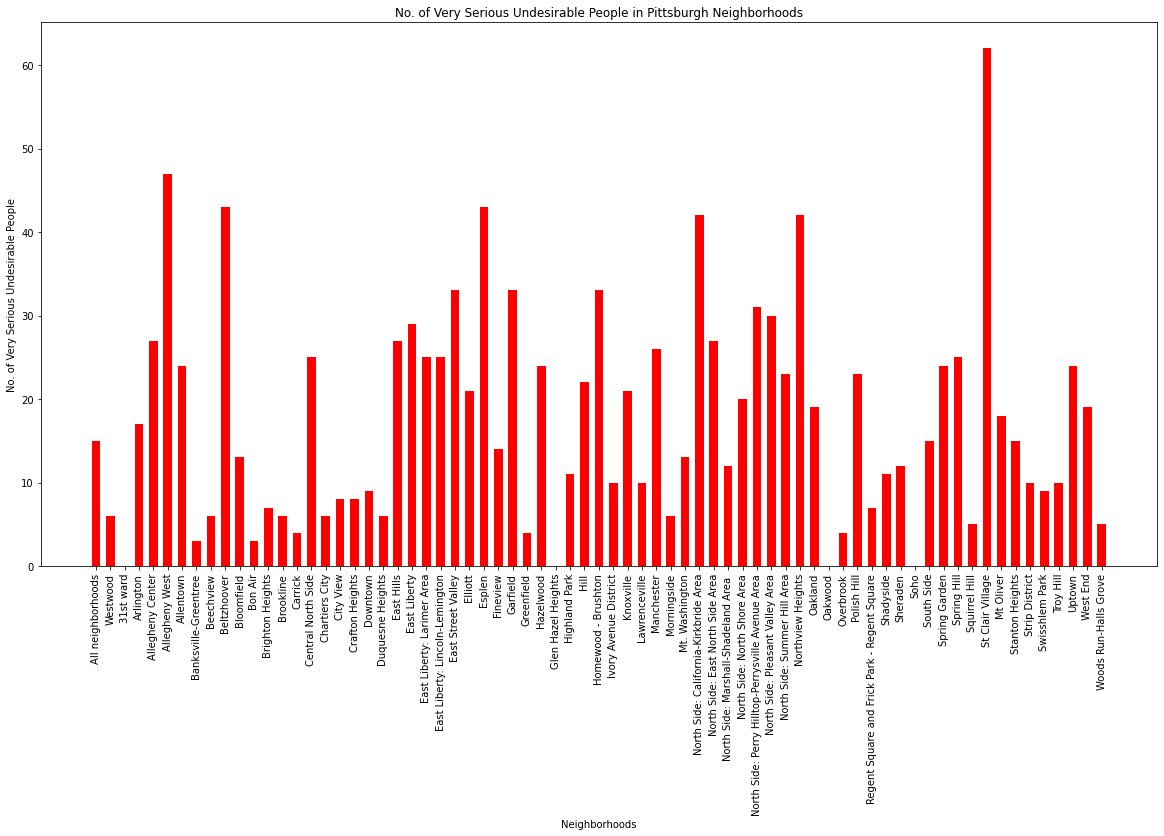

In [17]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(hoods, people, color ='red',
        width = 0.6)
plt.xticks(rotation=90)
 
plt.xlabel("Neighborhoods")
plt.ylabel("No. of Very Serious Undesirable People")
plt.title("No. of Very Serious Undesirable People in Pittsburgh Neighborhoods")
plt.show()

Above, it looks like St. Clair Village has the most, but again let's narrow the data down to our top 20 to get a better look.

In [18]:
top20Undesirable = undesirablePeople.sort_values(by= 'undesirable_people_very_serious_problem', ascending=False)[:20]
topHoodsUndesirable = top20Undesirable["neighborhood"]
topSkreetsUndesirable = top20Undesirable["undesirable_people_very_serious_problem"]
top20Undesirable

neighborhood  \
62                                   St Clair Village   
5                                      Allegheny West   
9                                         Beltzhoover   
27                                             Esplen   
49                                  Northview Heights   
42              North Side: California-Kirkbride Area   
29                                           Garfield   
25                                 East Street Valley   
35                                Homewood - Brushton   
46  North Side: Perry Hilltop-Perrysville Avenue Area   
47                   North Side: Pleasant Valley Area   
22                                       East Liberty   
43                   North Side: East North Side Area   
4                                    Allegheny Center   
21                                         East Hills   
39                                         Manchester   
15                                 Central North Side   
23                         East Liberty: Larimer Area   
24                    East Liberty: Lincoln-Lemington   
60                                        Spring Hill   

    undesirable_people_very_serious_problem  
62                                       62  
5                                        47  
9                                        43  
27                                       43  
49                                       42  
42                                       42  
29                                       33  
25                                       33  
35                                       33  
46                                       31  
47                                       30  
22                                       29  
43                                       27  
4                                        27  
21                                       27  
39                                       26  
15                                       25  
23                                       25  
24                                       25  
60                                       25

I created a new data frame for the top 20 neighborhoods with the most serious undesirable people problems, and I sorted it in descending order to get the highest values at the top.

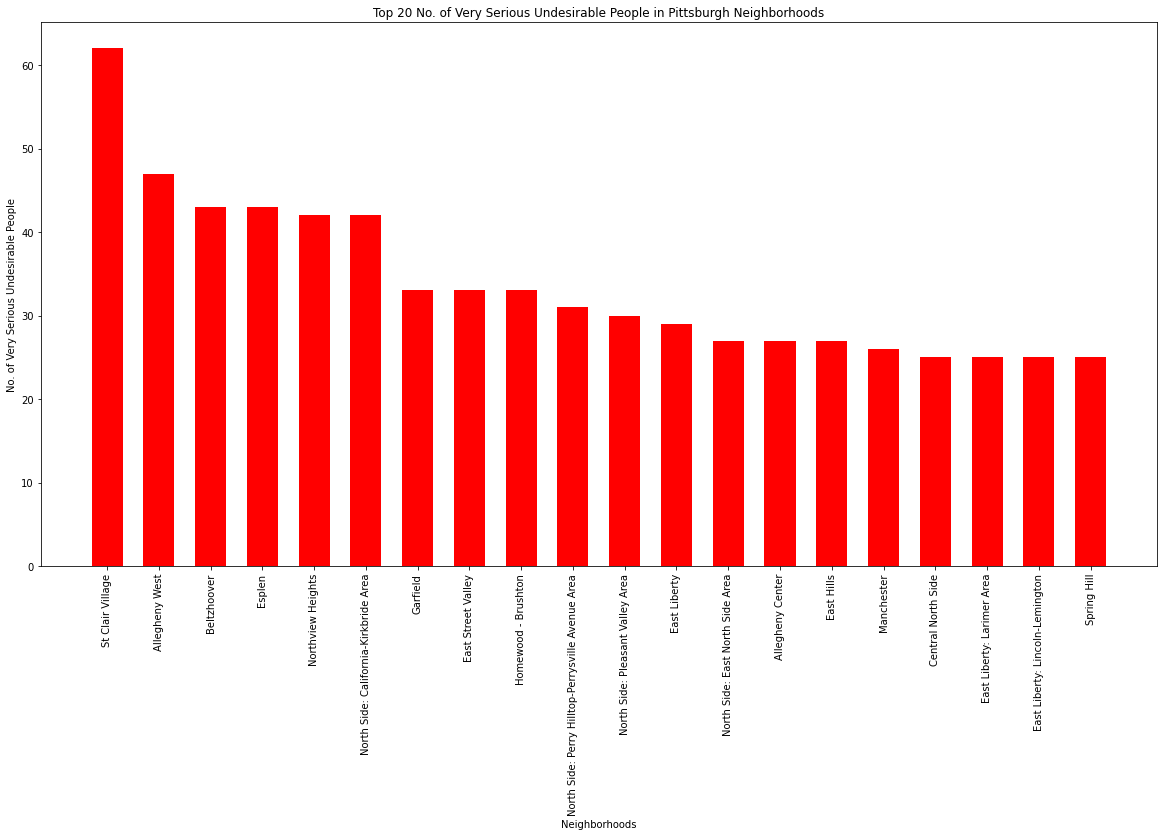

In [19]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(topHoodsUndesirable, topSkreetsUndesirable, color ='red',
        width = 0.6)
plt.xticks(rotation=90)
 
plt.xlabel("Neighborhoods")
plt.ylabel("No. of Very Serious Undesirable People")
plt.title("Top 20 No. of Very Serious Undesirable People in Pittsburgh Neighborhoods")
plt.show()

Now that we have a closer look, we can see by a long shot that St. Clair Village has the most number of very serious undesirable people problems.

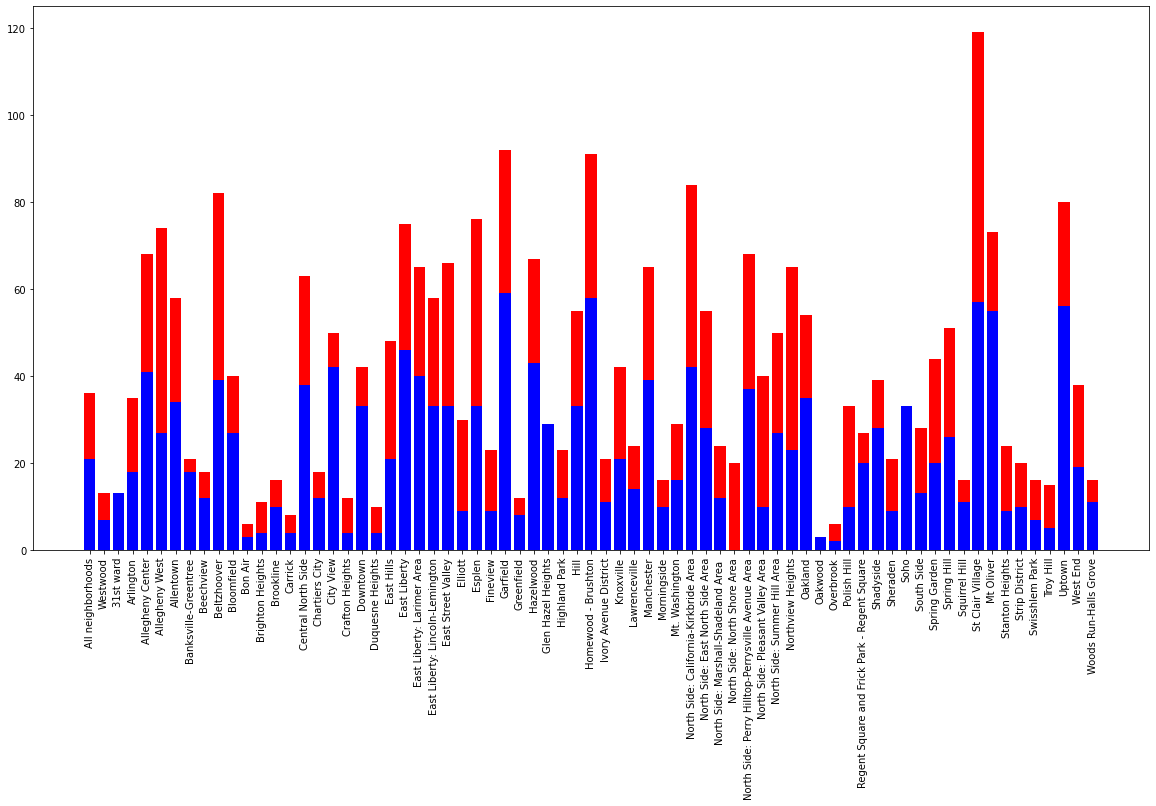

In [22]:
x = [hoods]
y1 = [skreets]
y2 = [people]
 
# plot bars in stack manner
plt.bar(hoods, skreets, color='b')
plt.bar(hoods, people, bottom=skreets, color='r')
#plt.figure(figsize = (100, 200))
plt.xticks(rotation = 90)
plt.xticks(fontsize = 10)
plt.rcParams["figure.figsize"] = (30, 15)
plt.show()

Looking at the stacked bar graph above, which includes both metrics from this data set, we can see that St. Clair Village is the best neighborhood to fight crime for this data set.

# Metric 3: Satisfaction

It is known that Batman did his best crime fighting in dark alleys. For this metric, we used a dataset that listed if a specifc part of a neighborhood was "satisfied", "neither", or "dissatisfied". For the sake of our goal, the best neighborhood will be the one that has the greatest number of parks dissatisfied, streets dissatisfied, and alleys dissatisfied.

In [2]:
import pandas as pd
import geopandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

satisfaction = pd.read_csv("sat.csv")
satisfaction.head(10)

neighborhood  parks_satisfied  parks_neither  parks_dissatisfied  \
0     All neighborhoods               51             15                  23   
1              Westwood               16             11                  56   
2             31st ward               13             13                  67   
3             Arlington               58             15                  15   
4      Allegheny Center               69             22                   6   
5        Allegheny West               73              7                   7   
6             Allentown               39             13                  40   
7  Banksville-Greentree               28             10                  54   
8             Beechview               32             15                  41   
9           Beltzhoover               63             13                  11   

   schools_satisfied  schools_neither  schools_dissatisfied  \
0                 46               12                    21   
1                 48               14                    18   
2                 20               33                    20   
3                 44               14                    25   
4                 35               14                    14   
5                 47                7                    13   
6                 56               13                    20   
7                 34               22                    22   
8                 49               15                    20   
9                 44               23                    10   

   street_maintenance_satisfied  street_maintenance_neither  \
0                            32                          15   
1                            18                          15   
2                            33                           7   
3                            29                          16   
4                            51                          22   
5                            40                          13   
6                            16                           4   
7                            27                          12   
8                            12                           9   
9                            17                          14   

   street_maintenance_dissatisfied  ...  public_transportation_dissatisfied  \
0                               49  ...                                  23   
1                               66  ...                                  25   
2                               53  ...                                  13   
3                               51  ...                                  52   
4                               22  ...                                   6   
5                               40  ...                                  20   
6                               75  ...                                  55   
7                               60  ...                                  25   
8                               77  ...                                  12   
9                               61  ...                                  34   

   fire_department_satisfied  fire_department_neither  \
0                         78                        7   
1                         56                       12   
2                         80                        0   
3                         80                       10   
4                         76                        2   
5                         87                        7   
6                         85                        6   
7                         53                       12   
8                         83                        5   
9                         70                        8   

   fire_department_disatisfied  sewage_system_satisfied  \
0                            3                       63   
1                           12                       59   
2                            7                       33   
3                  

Now that our dataset is succesfully loaded in, let's only show the columns that we are going to be using. Since the first row is not a neighborhood, we will need to get rid of it.

In [3]:
sat_new = satisfaction[['neighborhood', 'parks_dissatisfied', 'street_maintenance_dissatisfied', 'alley_mainenance_dissatisfied']]
sat_drop = sat_new.drop(labels=0, axis=0)
sat_drop

neighborhood  parks_dissatisfied  \
1                 Westwood                  56   
2                31st ward                  67   
3                Arlington                  15   
4         Allegheny Center                   6   
5           Allegheny West                   7   
..                     ...                 ...   
66          Swisshelm Park                  36   
67               Troy Hill                  15   
68                  Uptown                  44   
69                West End                  19   
70  Woods Run- Halls Grove                  29   

    street_maintenance_dissatisfied  alley_mainenance_dissatisfied  
1                                66                             37  
2                                53                             20  
3                                51                             57  
4                                22                             33  
5                                40                             47  
..                              ...                            ...  
66                               36                             24  
67                               46                             30  
68                               32                             53  
69                               62                             57  
70                               47                             44  

[70 rows x 4 columns]

Now that we have only the data we need stored in "sat_drop", let's visualize this data through a set of three bar graphs.

## Bar Graph 1: Parks

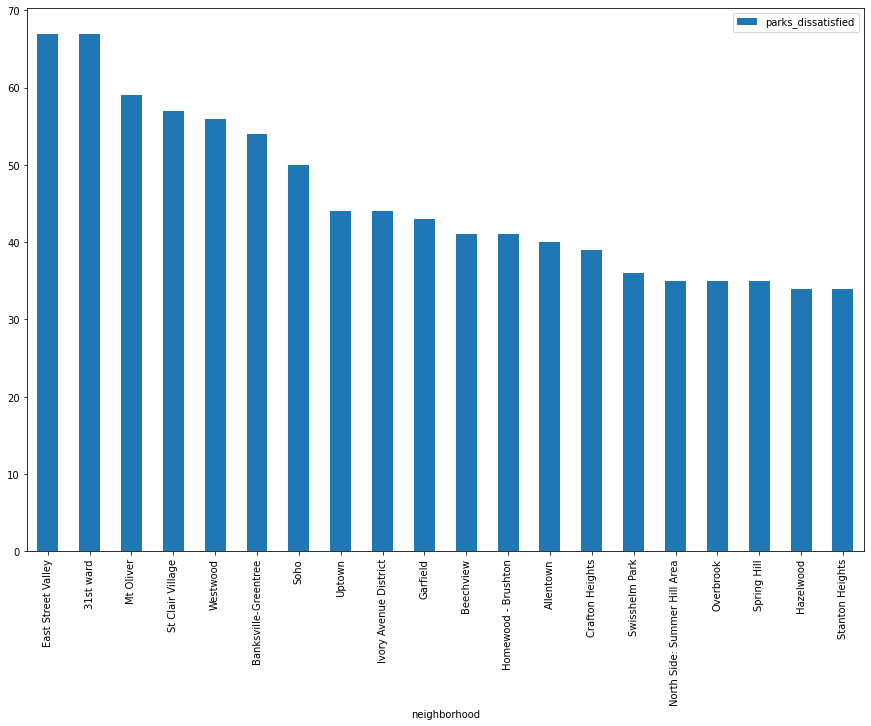

In [25]:
parkSort = sat_drop[['neighborhood', 'parks_dissatisfied']]
parkSort = parkSort.sort_values(by=['parks_dissatisfied'], ascending=False)
parkSort[:20].plot.bar(x='neighborhood', figsize = (15,10))

## Bar Graph 2: Street

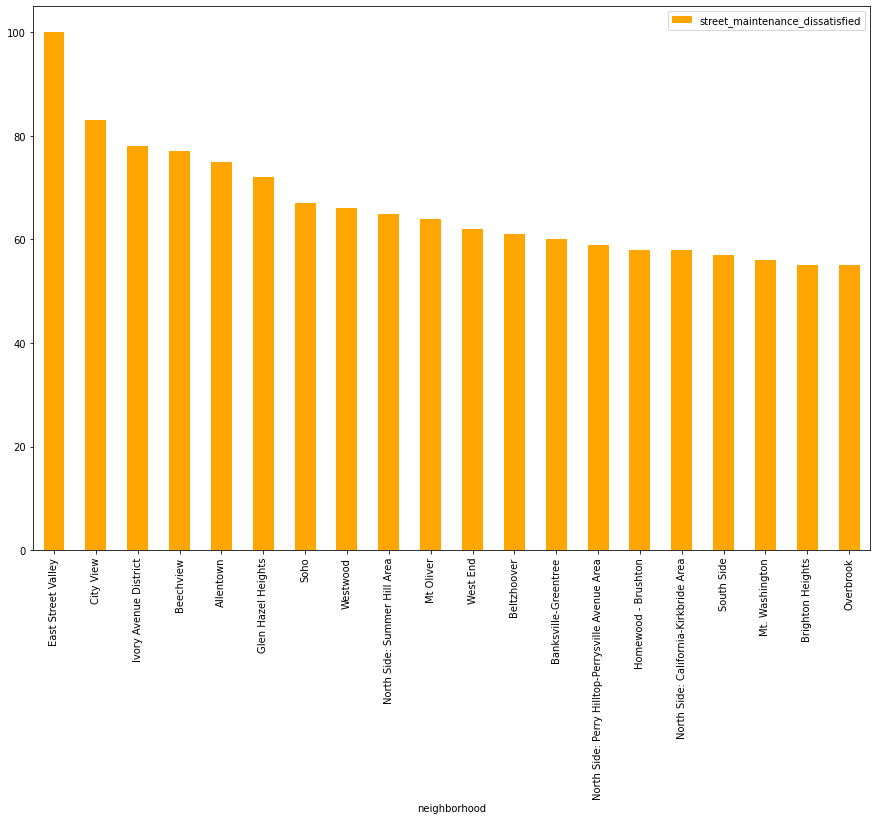

In [26]:
streetSort = sat_drop[['neighborhood', 'street_maintenance_dissatisfied']]
streetSort = streetSort.sort_values(by=['street_maintenance_dissatisfied'], ascending=False)
streetSort[:20].plot.bar(x='neighborhood', figsize = (15,10), color='orange')

## Bar Graph 3: Alleys

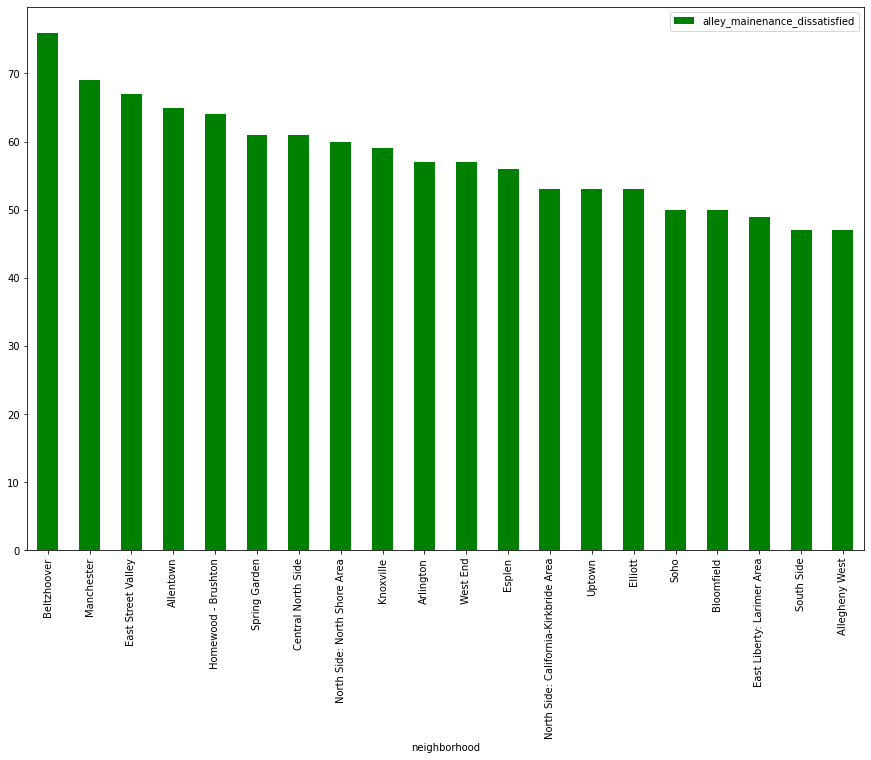

In [52]:
alleySort = sat_drop[['neighborhood', 'alley_mainenance_dissatisfied']]
alleySort = alleySort.sort_values(by=['alley_mainenance_dissatisfied'], ascending=False)
alleySort[:20].plot.bar(x='neighborhood', figsize = (15,10), color='green')

Although we can tell there is a pattern in East Street Valley, this visualization is not useful in seeing which neighborhood has the most number of dissatisfied places. To create an efficient bar graph, let's combine all three dissatisfied areas and stack them together on each neigborhood. This will tell us the neighborhood with the greatest number of dissatisfied areas.

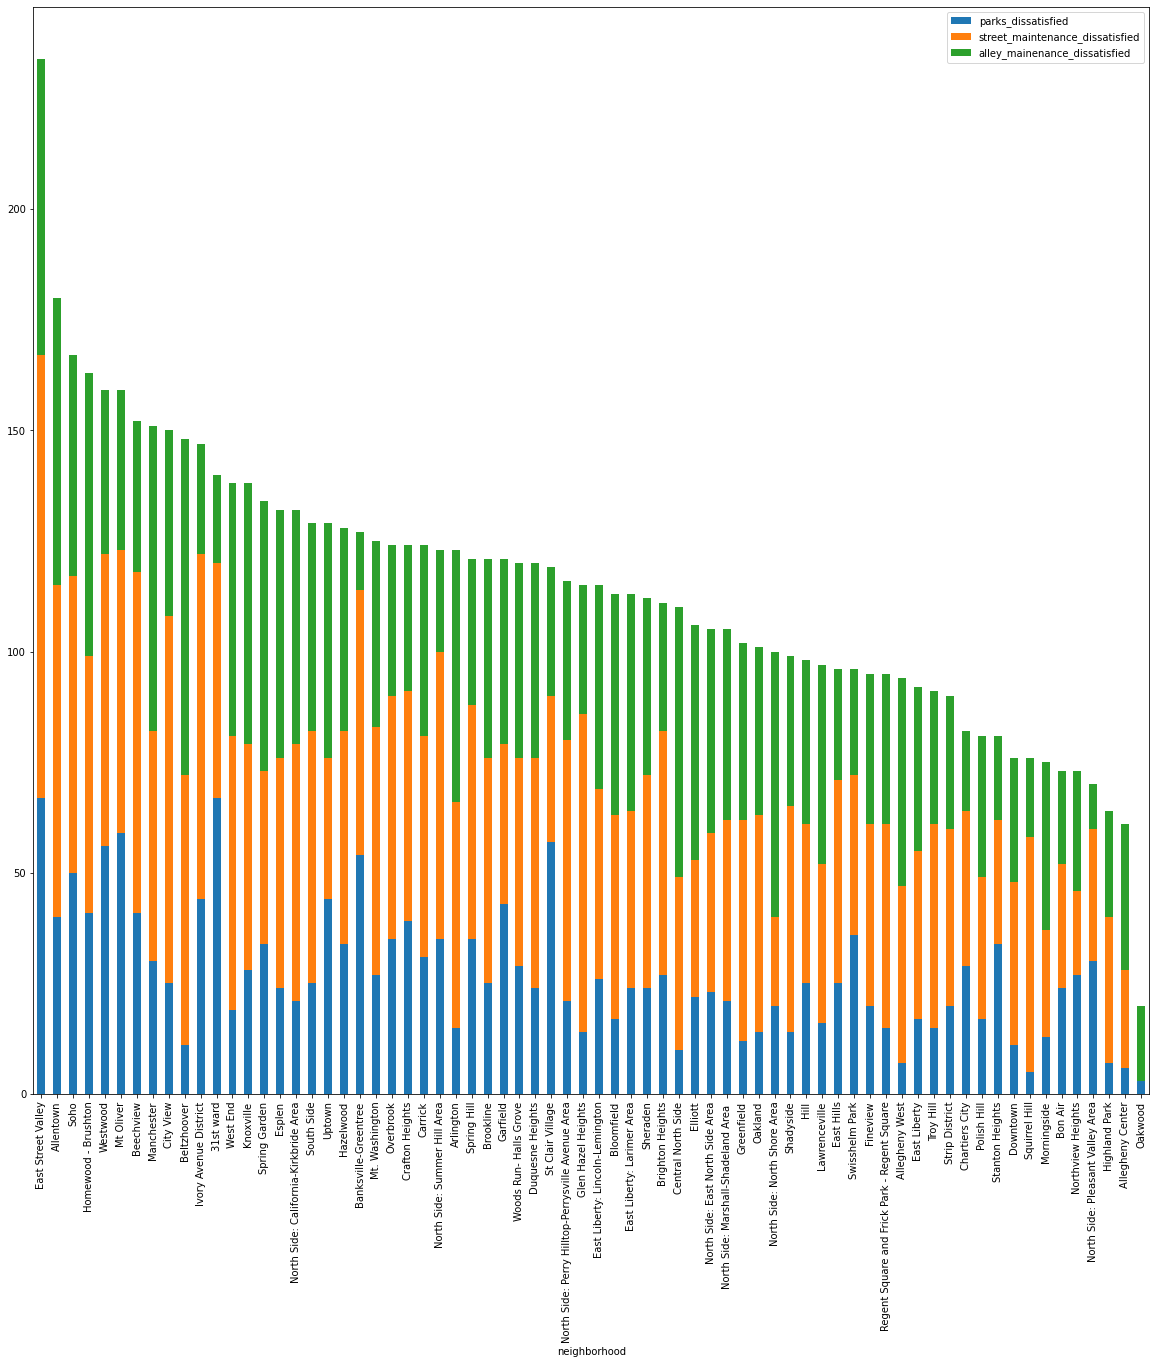

In [28]:
sat_drop['Total'] = sat_drop.sum(axis=1)
sat_drop = sat_drop.sort_values('Total', ascending=False)
sat_drop = sat_drop.drop('Total', axis=1)
sat_drop.plot.bar(x='neighborhood', stacked=True, figsize = (20,20))

As suspected, East Street Valley is the neighbothood with the greatest number. Just to get more visualization, let's plot this data onto a map of Pittsburgh. First we must import the shapefile.

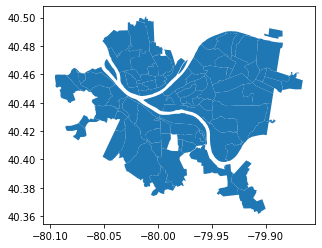

In [29]:
neighborhoodSat = geopandas.read_file("Neighborhoods_.shp")
neighborhoodSat.plot()

Now we need to do the same thing we did with the stacked bar graph and add each column together. Since we will need to merge with the shapefile, we created a "Count" column to store the total of each row.

In [10]:
sat_drop['Count'] = 0
sat_drop['Count'] = sat_drop.sum(axis=1)
sat_merge = pd.DataFrame(sat_drop, columns=['neighborhood', 'Count'])
sat_merge.sort_values(by='Count', ascending=False)

neighborhood  Count
25                East Street Valley    234
6                          Allentown    180
57                              Soho    167
35               Homewood - Brushton    163
1                           Westwood    159
..                               ...    ...
49                 Northview Heights     73
47  North Side: Pleasant Valley Area     70
33                     Highland Park     64
4                   Allegheny Center     61
51                           Oakwood     20

[70 rows x 2 columns]

Now comes the easy part, let's merge the two datasets together and plot the map.

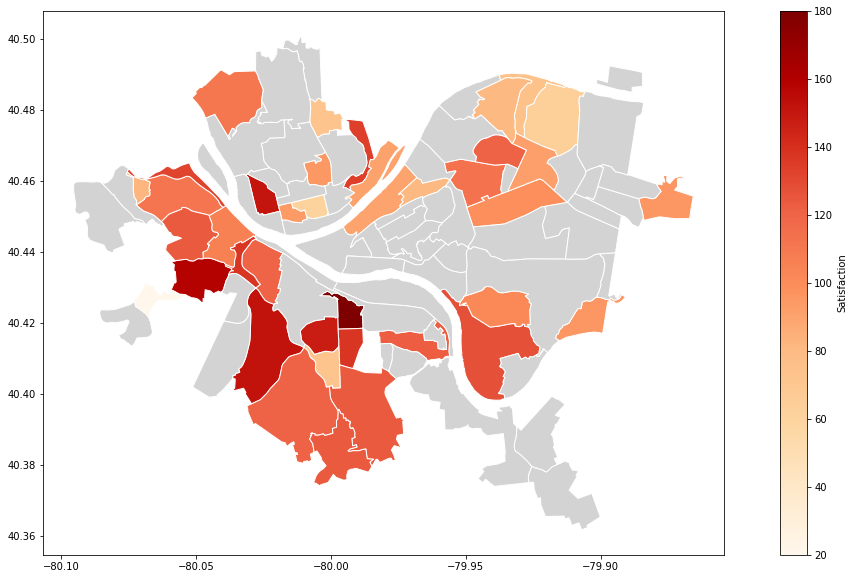

In [31]:
sat_map = neighborhoodSat.merge(sat_merge, how='left', left_on='hood', right_on='neighborhood')
sat_map.plot(column='Count',
               cmap='OrRd',              
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Satisfaction"}, 
               figsize=(20, 10),        
               missing_kwds={"color": "lightgrey"} 
               )

You may notice that this map lists Allentown as the neighborhood with the most amount of dissatisfied areas. It only says this because the shapefile did not have the same neighborhoods as the original dataset. East Street Valley is still the top neighborhood.

In [8]:
addedNums = neighborhoods[["neighborhood", "unsafe_streets_very_serious_problem", "undesirable_people_very_serious_problem"]]
addedNums["added"] = neighborhoods["unsafe_streets_very_serious_problem"] + neighborhoods["undesirable_people_very_serious_problem"]
totalAddedNums = addedNums[["neighborhood", "added"]]
totalAddedNumsNew = totalAddedNums.drop(labels=0, axis=0)
totalAddedNumsNew

<ipython-input-8-683e0e70fac6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  addedNums["added"] = neighborhoods["unsafe_streets_very_serious_problem"] + neighborhoods["undesirable_people_very_serious_problem"]


neighborhood  added
1                Westwood     13
2               31st ward     13
3               Arlington     35
4        Allegheny Center     68
5          Allegheny West     74
..                    ...    ...
66         Swisshlem Park     16
67              Troy Hill     15
68                 Uptown     80
69               West End     38
70  Woods Run-Halls Grove     16

[70 rows x 2 columns]

In [65]:
numData.columns = ["crime_count"]
merge1 = numData.merge(sat_merge, how='left', left_on = 'neighborhood', right_on='neighborhood')
finalMerge = merge1.merge(totalAddedNumsNew, how='left', left_on = 'neighborhood', right_on='neighborhood')
finalMerge

neighborhood  crime_count  Count  added
0      Allegheny Center          814   61.0   68.0
1        Allegheny West          370   94.0   74.0
2             Allentown         1243  180.0   58.0
3             Arlington          517  123.0   35.0
4     Arlington Heights          103    NaN    NaN
..                  ...          ...    ...    ...
93  Upper Lawrenceville          245    NaN    NaN
94             West End          183  138.0   38.0
95         West Oakland          431    NaN    NaN
96             Westwood          463  159.0   13.0
97              Windgap          199    NaN    NaN

[98 rows x 4 columns]

Now it is time to divide metric 1 total by the population of pittsburgh and metric 2 and 3 total by the average square feet per city in pittsburgh.

In [106]:
finalMerge['crime_calc'] = finalMerge['crime_count'] / 302425
finalMerge['sat_calc'] = (finalMerge['Count'] * 60) / 18077777
finalMerge['street_calc'] = (finalMerge['added'] * 50) / 18077777
finalMerge

neighborhood  crime_count  Count  added  crime_calc  \
78             South Side Flats         4419    NaN    NaN    0.014612   
37  Golden Triangle/Civic Arena         3637    NaN    NaN    0.012026   
9                    Bloomfield         2418  113.0   40.0    0.007995   
15                      Carrick         2435  124.0    8.0    0.008052   
74                    Shadyside         1803   99.0   39.0    0.005962   
..                          ...          ...    ...    ...         ...   
58                New Homestead           78    NaN    NaN    0.000258   
64               Outside County           42    NaN    NaN    0.000139   
65                Outside State           41    NaN    NaN    0.000136   
54                 Mount Oliver           36    NaN    NaN    0.000119   
56              Mt. Oliver Boro           16    NaN    NaN    0.000053   

    sat_calc  street_calc  
78       NaN          NaN  
37       NaN          NaN  
9   0.000375     0.000111  
15  0.000412     0.000022  
74  0.000329     0.000108  
..       ...          ...  
58       NaN          NaN  
64       NaN          NaN  
65       NaN          NaN  
54       NaN          NaN  
56       NaN          NaN  

[98 rows x 7 columns]

We gave the totals from metric 2 and 3 an increased weight of 50 for metric 2 and 60 for metric 3 because we found 50 to be the average size of a street. Metric 3 was multiplied by 60 because we took into account alleys and parks. Considering our project is to find the best neighborhood to fight crime, we didn't want metric 2 and 3 to have too much influence.

<ipython-input-107-739d306721be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['FinalTotal'] = test.sum(axis=1)


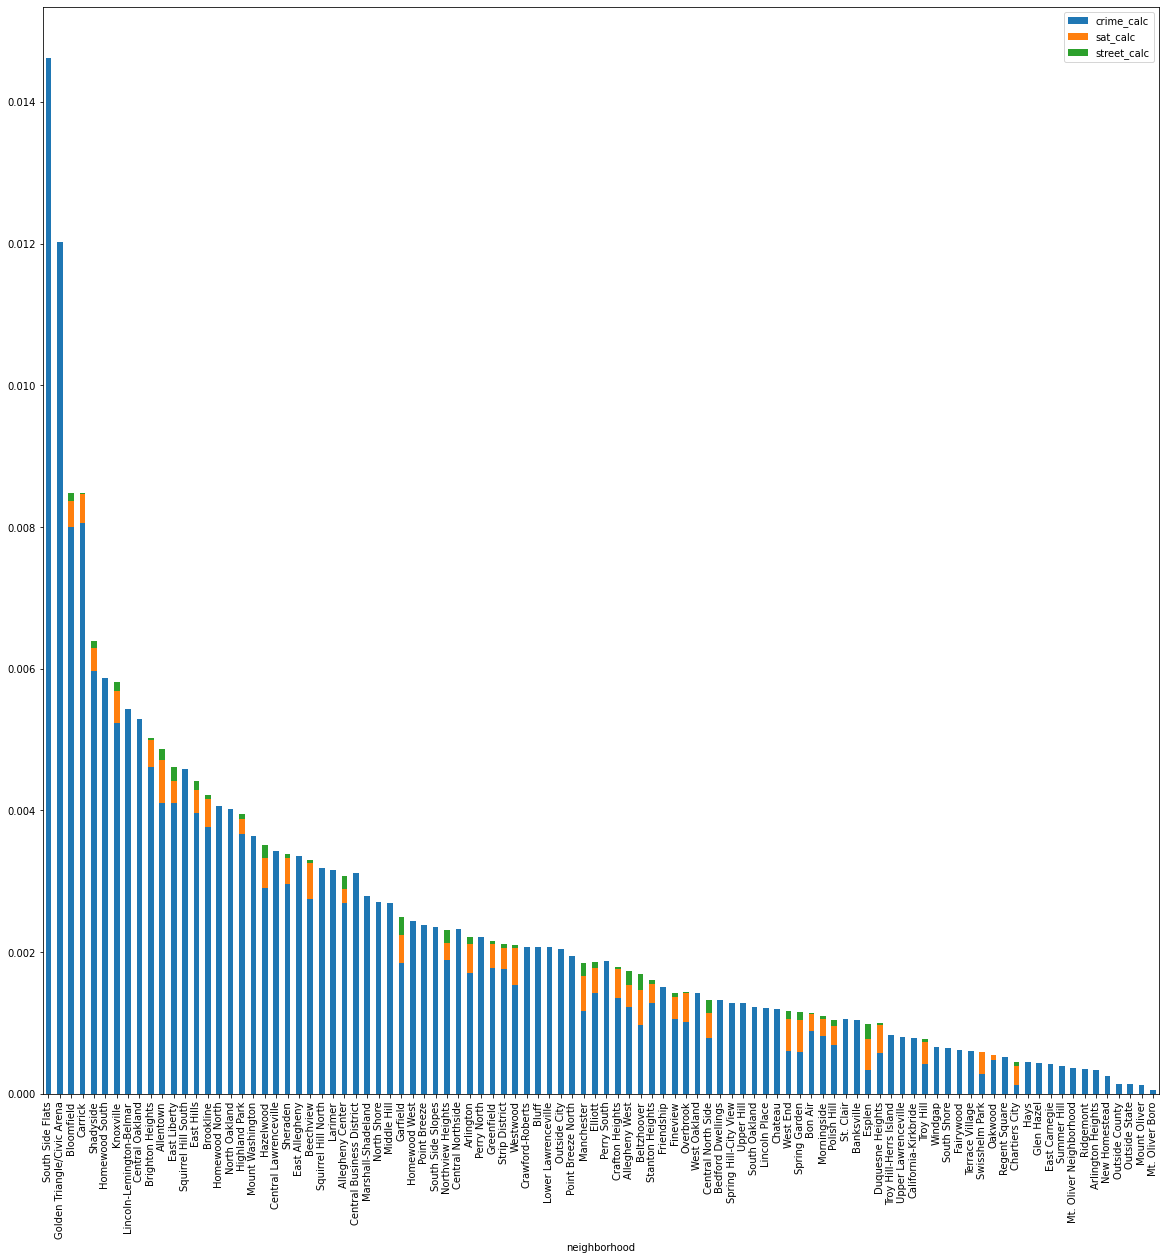

In [107]:
test = finalMerge[['neighborhood', 'crime_calc', 'sat_calc', 'street_calc']]
test['FinalTotal'] = test.sum(axis=1)
test = test.drop('FinalTotal', axis=1)
test.plot.bar(x = 'neighborhood', stacked=True, figsize = (20,20))